In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
data=pd.read_csv("Advertising.csv")

In [ ]:
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


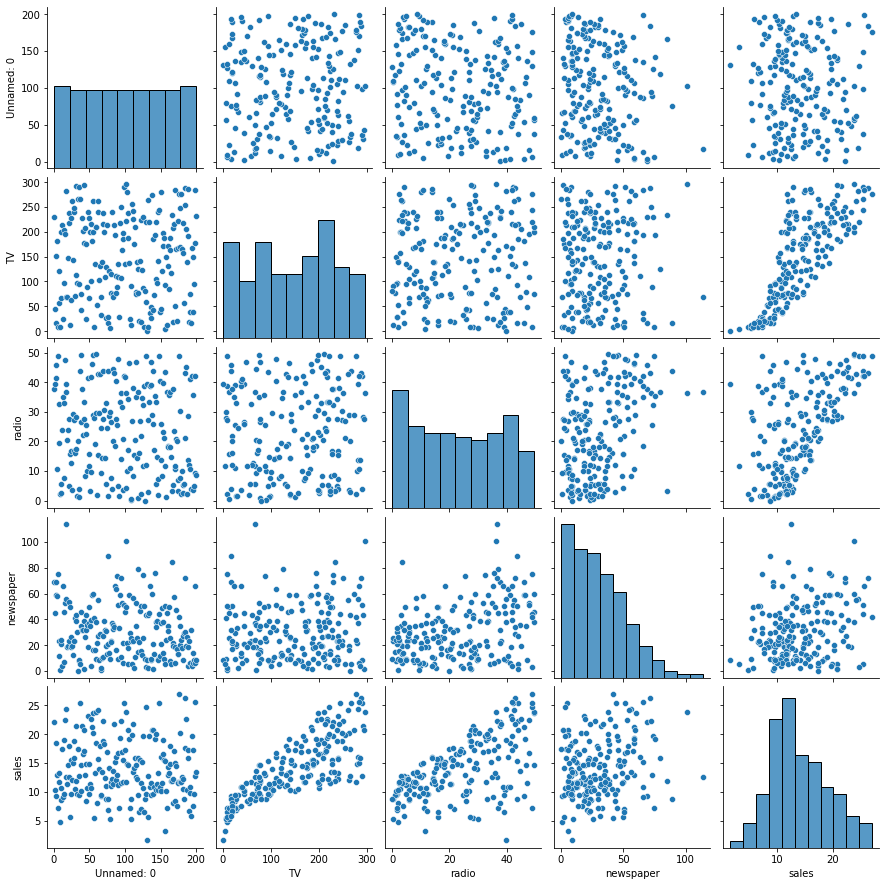

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


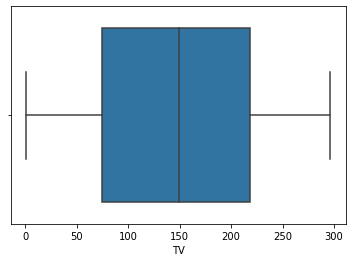

In [ ]:
sns.boxplot(data['TV'])

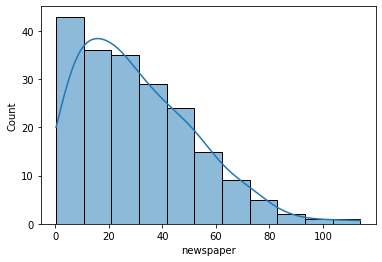

In [ ]:
sns.histplot(data['newspaper'],kde=True)

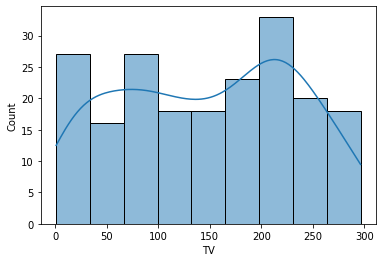

In [ ]:
sns.histplot(data['TV'],kde=True)

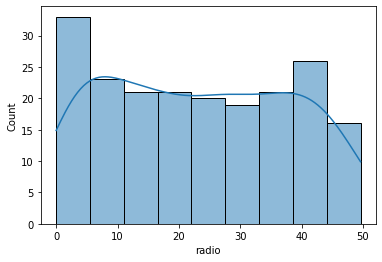

In [ ]:
sns.histplot(data['radio'],kde=True)

In [ ]:
data.cov()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,3350.000000,88.027387,-95.110050,-195.311558,-15.587186
TV,88.027387,7370.949893,69.862492,105.919452,350.390195
radio,-95.110050,69.862492,220.427743,114.496979,44.635688
newspaper,-195.311558,105.919452,114.496979,474.308326,25.941392
sales,-15.587186,350.390195,44.635688,25.941392,27.221853


In [ ]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

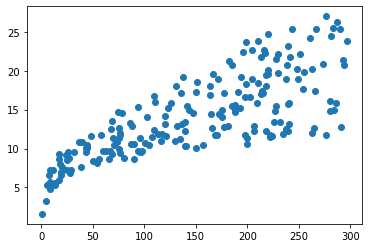

In [ ]:
plt.scatter(data["TV"],data["sales"])

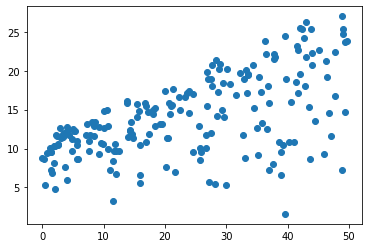

In [ ]:
plt.scatter(data["radio"],data["sales"])

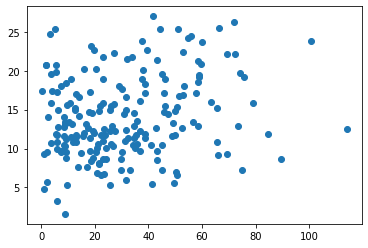

In [ ]:
plt.scatter(data["newspaper"],data["sales"])

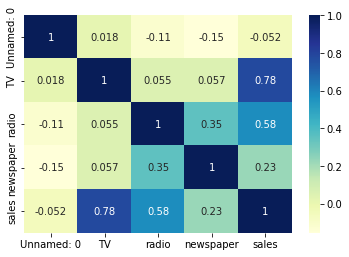

In [ ]:
df_plot = sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sd=StandardScaler()
scalar=sd.fit_transform(data)

In [ ]:
df=pd.DataFrame(scalar,columns=['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'])

In [ ]:
x=df[['TV', 'radio','newspaper']]
y=df[["sales"]]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30)

In [ ]:
x_test.shape

(30, 3)

In [ ]:
x_train.shape

(170, 3)

In [ ]:
y_test.shape

(30, 1)

In [ ]:
y_train.shape

(170, 1)

In [ ]:
x= data[['TV', 'radio', 'newspaper']]
y = data["sales"]
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.58e-96
Time:                        14:15:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.predict(x_test)

array([[ 0.13042471],
       [ 0.31228405],
       [-0.38097156],
       [-0.30512777],
       [ 0.45211885],
       [ 1.14941744],
       [ 1.79090882],
       [ 0.78980591],
       [-1.66341417],
       [-0.68047018],
       [-0.3915788 ],
       [ 0.17875978],
       [-0.64196679],
       [ 0.95535649],
       [-0.83496713],
       [ 0.28622183],
       [-1.83531806],
       [ 1.39472316],
       [-0.07368438],
       [ 1.45613339],
       [-0.67871997],
       [-0.66644124],
       [ 0.74573419],
       [-0.27668391],
       [-0.02461732],
       [-1.33280168],
       [-0.14632067],
       [ 1.22385097],
       [-0.39850003],
       [ 0.87117547]])

In [ ]:
lr.score(x_test,y_test)

0.8997691071966053